## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [3]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

#### Import the CSV Data as Pandas DataFrame

In [28]:
df = pd.read_csv('/Users/shashankrallapalli/Documents/gitrepo/MLProject/notebook/data/stud.csv')

In [29]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [43]:
#adding total and avg columns
df['total_score']= df['math_score']+df['reading_score']+df['writing_score']
df['average_score']=df['total_score']/3
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


#### Preparing X and Y variables

In [91]:
X = df.drop(columns=['total_score','reading_score','writing_score','average_score'],axis=1)

In [92]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score
0,female,group B,bachelor's degree,standard,none,72
1,female,group C,some college,standard,completed,69
2,female,group B,master's degree,standard,none,90
3,male,group A,associate's degree,free/reduced,none,47
4,male,group C,some college,standard,none,76


In [93]:
y = df['total_score']
y.head()

0    218
1    247
2    278
3    148
4    229
Name: total_score, dtype: int64

In [96]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [97]:
X = preprocessor.fit_transform(X)

In [98]:
X.shape

(1000, 18)

In [99]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 18), (200, 18))

#### Create an Evaluate Function to give all metrics after model Training

In [100]:
def evaluate_model(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    r2_square = r2_score(actual, predicted)
    return mae, rmse, r2_square

In [101]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 10.3163
- Mean Absolute Error: 8.2362
- R2 Score: 0.9407
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 10.1552
- Mean Absolute Error: 8.0367
- R2 Score: 0.9465


Lasso
Model performance for Training set
- Root Mean Squared Error: 11.3706
- Mean Absolute Error: 9.1938
- R2 Score: 0.9280
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 11.2345
- Mean Absolute Error: 8.7360
- R2 Score: 0.9346


Ridge
Model performance for Training set
- Root Mean Squared Error: 10.3124
- Mean Absolute Error: 8.2415
- R2 Score: 0.9408
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 10.1817
- Mean Absolute Error: 8.0622
- R2 Score: 0.9463


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 15.6115
- Mean Absolute Error: 12.5405
- R2 Score: 0.8642
---------------

In [102]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Linear Regression,0.946546
2,Ridge,0.946267
1,Lasso,0.934581
7,CatBoosting Regressor,0.928084
5,Random Forest Regressor,0.922114
8,AdaBoost Regressor,0.919918
6,XGBRegressor,0.916848
4,Decision Tree,0.889554
3,K-Neighbors Regressor,0.815979


### Linear Regression

In [103]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 94.65


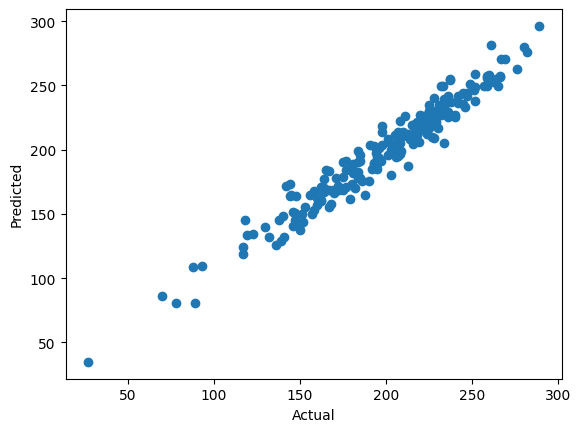

In [104]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

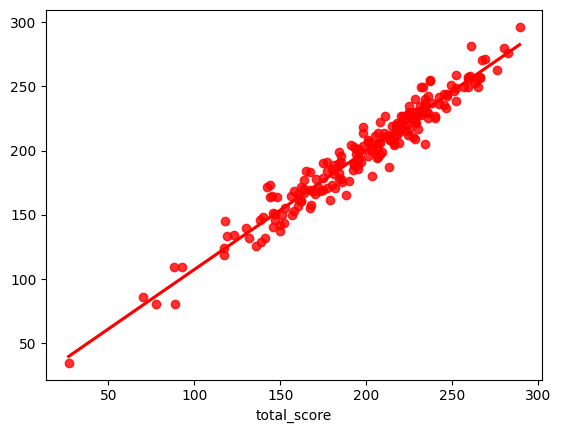

In [105]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [106]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,261,281.37500,-20.37500
737,192,184.96875,7.03125
740,225,229.25000,-4.25000
660,224,212.12500,11.87500
411,245,235.68750,9.31250
...,...,...,...
408,165,183.93750,-18.93750
332,171,177.75000,-6.75000
208,231,234.71875,-3.71875
613,216,210.37500,5.62500
